Combinaison des codes de Polizzi Victor du stage 2018 (Lis).
Par: Polizzi Victor
Le 01/03/2019
Dernière modification: 19/02/2019 

# Chargement des modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as patches
import matplotlib.path as path
import matplotlib.colors as mcolors
import scipy as s
import h5py 
import numpy as np
import matplotlib.pyplot as plt
import tables
from scipy.stats import shapiro
from scipy.stats import norm
from math import floor 


## Chargement données

In [2]:
#use var=pd.read_csv('File_Name.csv') to open a csv file in the variable var
data=pd.read_csv('tdoa_sess_4.csv')#
data['click_time']=pd.to_datetime(data['click_time'])

## Affichage données brutes

(736571.0, 736572.0)

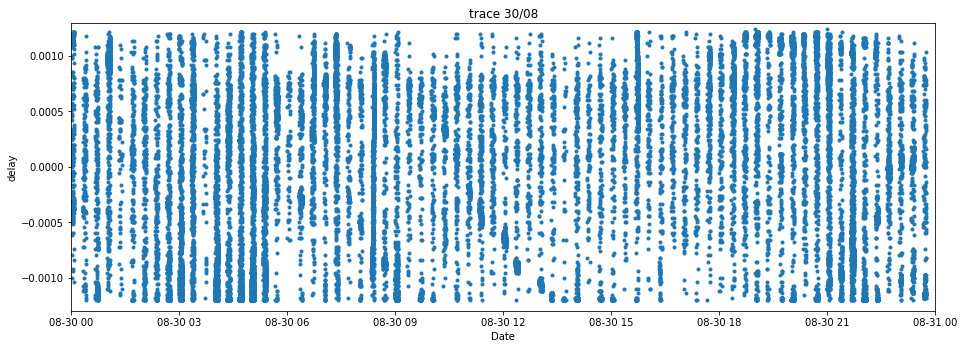

In [3]:
yr=2017
mth=8
da=30


cc1=data.loc[(data['click_time']>='%d-%d-%d 00:00:00.0'%(yr,mth,da))
             &(data['click_time']<'%d-%d-%d 00:00:00'%(yr,mth,da+1))
             #&(data['ipi']>0.0048)&(data['ipi']<0.0055)

             ]


plt.plot(cc1['click_time'],cc1['tdoa'],'.')
plt.subplots_adjust(top=1, bottom=0, left=0, right=2, hspace=0.25,wspace=0.15)
plt.title("trace %d/08"%(da))
plt.xlabel('Date')
plt.ylabel('delay')
plt.ylim([-0.0013,0.0013])
plt.xlim(['2017-08-%d 00:00:00.0'%(da),'2017-08-%d 00:00:00'%(da+1)])

# Traitement

In [4]:
#On cherche à sélectionner les données qui posèdent une densité de 'clic détecté' assez haut(limite à définir). 
#Les bruits de fond seront éliminés (plus ou moins), et les traces plus lisibles.

In [5]:
#Uniquement pour test = limiter la quantité de données à calculer à un jour.
data=cc1.reset_index(drop = True)

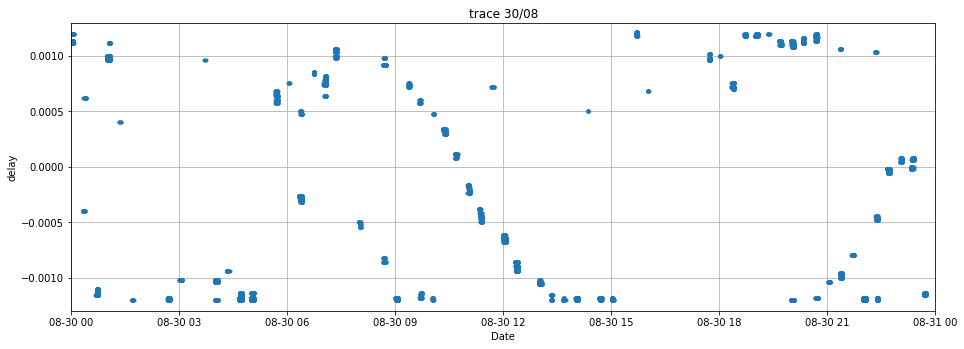

In [6]:
#on fixe les variables de temps au T0 des données (on peut aussi fixer les dates de départ et de fin)
d0=data.loc[0]['click_time']                                     #On prend la date de la première détection
T0=pd.to_datetime('%d-%d-%d 00:00:00'%(d0.year,d0.month,d0.day)) #On modifie l'heure à 00:00:00 et on le met dans T0
Tt=data.loc[data.shape[0]-1]['click_time']                       #On prend la dernière détection 

dt20=pd.to_timedelta('00:20:00')      #à chaque tour de boucle on avance T0 de 20 minutes
sep=0.00001                           #taille des segments de TDOA en seconde a:0.0001  b:0.00001
TDOAsep=np.arange(-0.0013,0.0013,sep) #on sépare la gamme des TDOA en unités de 0.0001s
Dlim=0.06                             #Densité minimale pour que les points soient validés a:0.15~0.25  b:0.06
data2=pd.DataFrame()                  #Initialisation du dataframe vide pour les données filtrées

#Boucle
for i in np.arange(T0,Tt,dt20):#i allant de T0 à Tt par increments de 20 minutes
    dtemp1=data.loc[(data['click_time']>=i)
                    &(data['click_time']<i+dt20)
                    ]#On isole data entre i et i+20mins
    
    if dtemp1.shape[0]>0:
        nbtotal=dtemp1.shape[0]#Nombre total de clic dans le dataframe (nb de lignes)

        for j in TDOAsep:
            dtemp2=dtemp1.loc[(dtemp1['tdoa']>=j)
                           &(dtemp1['tdoa']<=j+sep)
                          ]#On isole data  dans l'interval de TDOA entre j et j+sep dans dtemp
            
            if dtemp2.shape[0]>0:
                D=(dtemp2.shape[0])/nbtotal#calcul de la densité de pts dan l'intelval de TDOA donné par rapport au nb total de pts
                if D>Dlim:
                    data2=pd.concat([data2,dtemp2], ignore_index = True)

#Affichage pour verification
ccc1=data2.loc[(data2['click_time']>='2017-08-%d 00:00:00.0'%(da))
              &(data2['click_time']<'2017-08-%d 00:00:00'%(da+1))
             ]
ccc1=ccc1.reset_index(drop=True)
plt.plot(ccc1['click_time'],ccc1['tdoa'],'.')
plt.subplots_adjust(top=1, bottom=0, left=0, right=2, hspace=0.25,wspace=0.15)
plt.title("trace %d/08"%(da))
plt.xlabel('Date')
plt.ylabel('delay')
plt.ylim([-0.0013,0.0013])
plt.xlim(['2017-08-%d 00:00:00.0'%(da),'2017-08-%d 00:00:00'%(da+1)])
plt.grid()

In [9]:
data2.to_csv('data2.csv')

# Isolation de traces à la main

In [10]:
#L'isolation se fait à la main (pas trouver de moyen automatique, trop compliquer)
#après le traitement précédent on observe le TDOA jour après jour pour identifier a la main les track
#On note les limites en TDOA pour chaque block appartenant à la même track
#on les sépares dans un DataFrame séparé et spécifique à chaque teack 

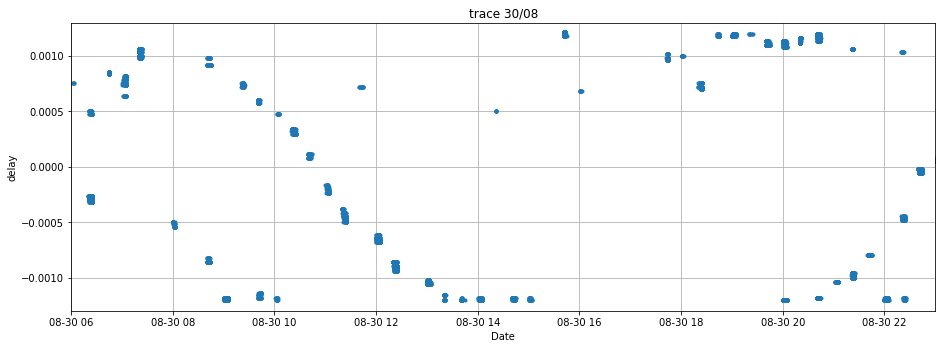

In [33]:
# Exemple d'une trck simple


da=30
ccc1=data2.loc[(data2['click_time']>='2017-08-%d 00:00:00.0'%(da))
               &(data2['click_time']<'2017-08-%d 00:00:00'%(da+1))
               #&(data2['ipi']>0.0048)&(data2['ipi']<0.0055)
             ]



plt.figure()
plt.plot(ccc1['click_time'],ccc1['tdoa'],'.')
plt.subplots_adjust(top=1, bottom=0, left=0, right=2, hspace=0.25,wspace=0.15)
plt.title("trace %d/08"%(da))
plt.xlabel('Date')
plt.ylabel('delay')
plt.ylim([-0.0013,0.0013])
plt.xlim(['2017-08-%d 06:00:00.0'%(da),'2017-08-%d 23:00:00'%(da)])
plt.grid()

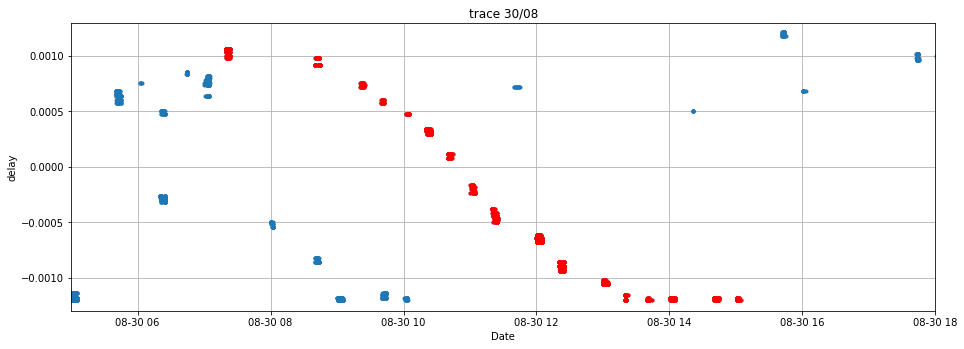

In [24]:
a=data2.loc[(data2['click_time']>='2017-08-%d 07:20:00.0'%(da))
            &(data2['click_time']<'2017-08-%d 10:20:00.0'%(da))
            &(data2['tdoa']>0)]

b=data2.loc[(data2['click_time']>='2017-08-%d 10:20:00.0'%(da))
            &(data2['click_time']<'2017-08-%d 11:00:00.0'%(da))]

c=data2.loc[(data2['click_time']>='2017-08-%d 11:00:00.0'%(da))
            &(data2['click_time']<'2017-08-%d 15:20:00.0'%(da))
            &(data2['tdoa']<0)]

Track1=pd.concat([a,b,c])

plt.figure()
plt.plot(ccc1['click_time'],ccc1['tdoa'],'.')
plt.plot(Track1['click_time'],Track1['tdoa'],'.',color='r')
plt.subplots_adjust(top=1, bottom=0, left=0, right=2, hspace=0.25,wspace=0.15)
plt.title("trace %d/08"%(da))
plt.xlabel('Date')
plt.ylabel('delay')
plt.ylim([-0.0013,0.0013])
plt.xlim(['2017-08-%d 05:00:00.0'%(da),'2017-08-%d 18:00:00'%(da)])
plt.grid()


## Calcul des pentes (direction / vitesse / distance)

In [13]:
# Deux possiiliés:
# 1: La pente est calculé le plus prés possible de TDOA=0 la ou la pente est la plus forte.
# 2: La pente est calculé avec les points au début des pentes entre la partie plate et la partie en pente.
# La seconde technique est plus simple mais moins précise que la première. Elle et cependant interessante
# en cas de perte ou manque de données au niveau TDOA=0

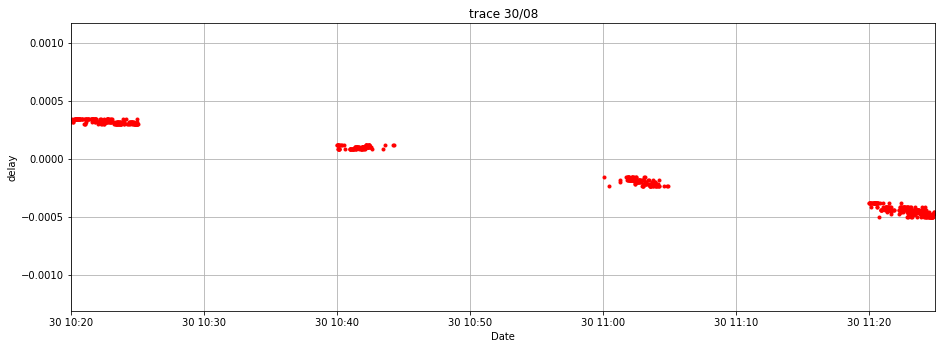

In [14]:
plt.figure()

plt.plot(Track1['click_time'],Track1['tdoa'],'.',color='r')
plt.subplots_adjust(top=1, bottom=0, left=0, right=2, hspace=0.25,wspace=0.15)
plt.title("trace %d/08"%(da))
plt.xlabel('Date')
plt.ylabel('delay')
#plt.ylim([-0.0005,-0.0004])
plt.xlim(['2017-08-%d 10:20:00.0'%(da),'2017-08-%d 11:25:00'%(da)])
plt.grid()


In [15]:
# on utilise les points à 10:20 et 11:25 ou 10:40 et 11:05 
yA=0.000325
yB=-0.00046

xA=pd.to_datetime('10:22:30')
xB=pd.to_datetime('11:22:30')

dy=yB-yA
dx=xB-xA

In [16]:
pente=dy/(dx.seconds/(3600))
print('pente :', pente, 's/heure')

pente : -0.000785 s/heure


In [17]:
# Pour détemrminer la direction on observe le signe de la pente. 
# Si la pente est négative : E -> O
# Si la pente est positive : O -> E
# à verifier

In [18]:
t=Track1.loc[(Track1['click_time']>='2017-08-%d 10:20:00.0'%(da))&(Track1['click_time']<'2017-08-%d 11:25:00.0'%(da))]